Mean squared error is 
38492699.30141963


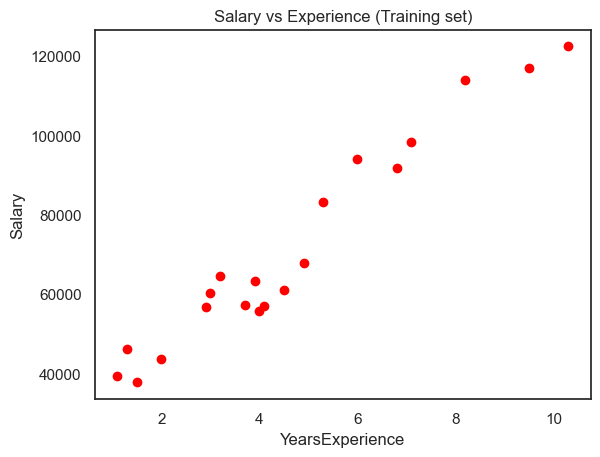

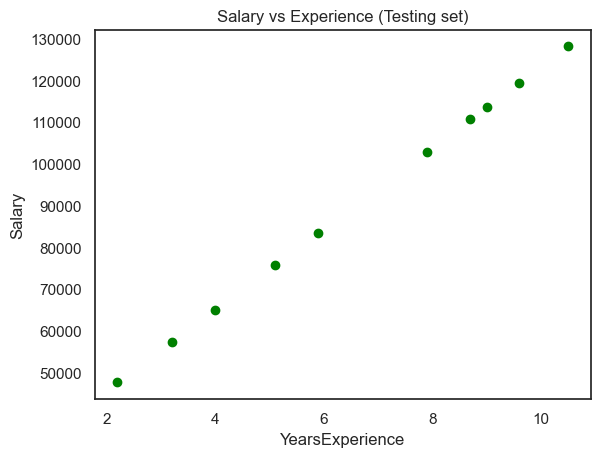

In [83]:
#1. Simple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import mean_squared_error

# Importing the datasets 
datasets = pd.read_csv('Salary_Data.csv')

X = datasets.iloc[:, :-1].values
Y = datasets.iloc[:, 1].values
datasets.head(5)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.33)

# Fitting Simple Linear Regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_Train, Y_Train)

# Predicting the Test set result 
Y_Pred = regressor.predict(X_Test)

# Mean squared error
print("Mean squared error is ")
print(mean_squared_error(Y_Test,Y_Pred))


# Visualising the Training set results
plt.scatter(X_Train, Y_Train, color = 'red')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()


# Visualising the Test set results
plt.scatter(X_Test, Y_Pred, color = 'green')
plt.title('Salary vs Experience (Testing set)')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

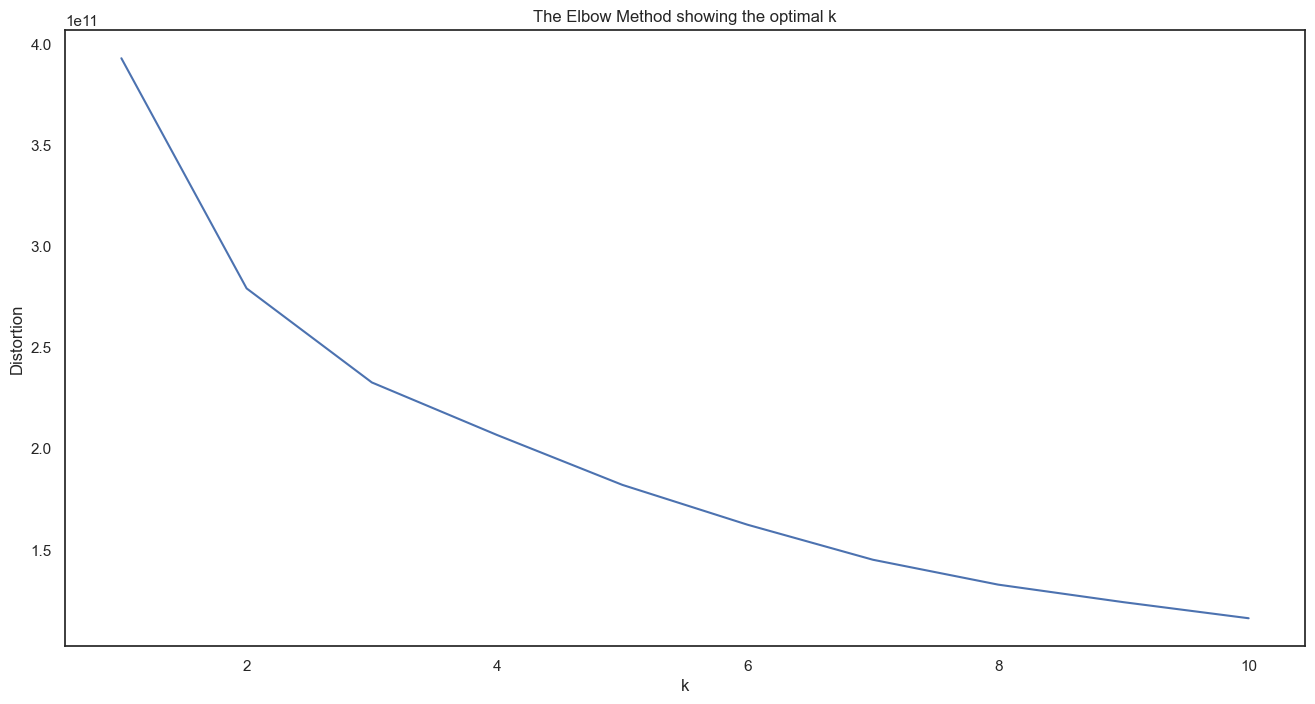

In [84]:
# 2. K-means

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

dataset = pd.read_csv('KMeanDataset.csv')

# Replacing null values by mean 
dataset1=dataset.fillna(dataset.mean())
dataset1=dataset1.drop('CUST_ID',axis=1)

x = dataset1.iloc[:, :-1].values
y = datasets.iloc[:, 1].values

### elbow method to know the number of clusters     
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeanModel.fit(x)
    distortions.append(kmeanModel.inertia_)
    y_cluster_kmeans = kmeanModel.predict(x)

plt.figure(figsize=(16,8))
plt.plot(K, distortions)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()




In [85]:
from sklearn.cluster import KMeans
nclusters = 4 # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(x)

y_cluster_kmeans = km.predict(x)
from sklearn import metrics
score = metrics.silhouette_score(x, y_cluster_kmeans)
print("Silhouette score is")
print(score)

Silhouette score is
0.464450725322489


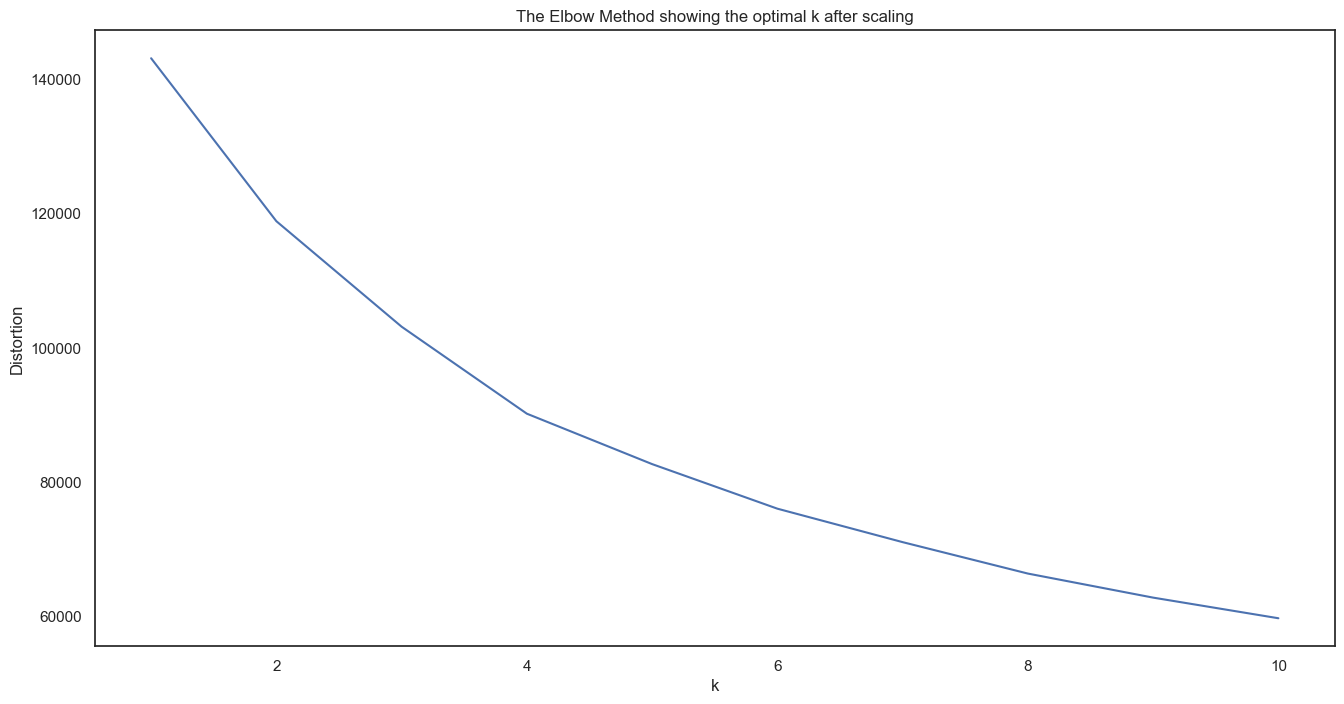

In [86]:
# 3. K-means - feature scaling

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

dataset = pd.read_csv('KMeanDataset.csv')

# Replacing null values by mean 
dataset1=dataset.fillna(dataset.mean())
dataset1=dataset1.drop('CUST_ID',axis=1)

x = dataset1.iloc[:, :-1].values
y = datasets.iloc[:, 1].values

scaler = preprocessing.StandardScaler()
scaler.fit(x)
x_scaled_array = scaler.transform(x)
x_scaled = pd.DataFrame(x_scaled_array)

### elbow method to know the number of clusters     
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeanModel.fit(x_scaled)
    distortions.append(kmeanModel.inertia_)


plt.figure(figsize=(16,8))
plt.plot(K, distortions)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k after scaling')
plt.show()




In [87]:

from sklearn.cluster import KMeans
nclusters = 6 # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(x_scaled)

y_cluster_kmeans = km.predict(x_scaled)
from sklearn import metrics
score = metrics.silhouette_score(x_scaled, y_cluster_kmeans)
print("Silhouette score after scaling is")
print(score)

Silhouette score after scaling is
0.22423638616324557
